# 주성분 분석(Principal Component Analysis, PCA)
---
**주성분 분석**(PCA): 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 특성을 잡아냄
- 비지도 선형 변환 기법으로 특성 추출과 차원 축소 용도로 사용됨

**PCA 단계**
1. 데이터를 포준화 전처리
2. 공분산 행렬을 구성
3. 공분산 행렬의 고유값과 고유 벡터를 구함
4. 고유값을 내림차순으로 정렬하여 고유 벡터의 순위를 매김

# 비지도 학습(주성분 분석) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**다중 분류**(Multiclass Classification): **결정 트리**(Decision Tree)

**주성분 분석**(PCA)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비 & 전처리

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- X, y 분리

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

- 데이터 분리(train, test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=1234)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
# stratify 적용
y_train.value_counts()

2    40
1    40
0    40
Name: target, dtype: int64

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.836667,0.828681,4.3,5.1,5.75,6.4,7.9
sepal width (cm),120.0,3.055000,0.438073,2.0,2.8,3.00,3.4,4.2
petal length (cm),120.0,3.728333,1.768453,1.0,1.5,4.20,5.1,6.9
petal width (cm),120.0,1.179167,0.752016,0.1,0.3,1.30,1.8,2.5


### 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train[:5]

array([[ 1.28854448,  0.10315342,  0.77888299,  1.49668653],
       [ 1.28854448,  0.10315342,  0.94923407,  1.22961979],
       [ 0.1979269 , -1.95991489,  0.15426237, -0.23924729],
       [-1.74094881, -0.35530621, -1.32211366, -1.30751426],
       [-0.40797176, -1.50145526,  0.04069498, -0.10571392]])

### 차원 축소
- **주성분 분석**(PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_train[:5]

array([[ 1.9215006 ,  0.74633874],
       [ 1.86946078,  0.73836516],
       [ 0.63410493, -1.6897813 ],
       [-2.2855147 , -1.17562205],
       [ 0.19898944, -1.53259217]])

In [ ]:
df = pd.DataFrame(X_train, columns=['X_1', 'X_2'])
df.head()

,X_1,X_2
0,1.921501,0.746339
1,1.869461,0.738365
2,0.634105,-1.689781
3,-2.285515,-1.175622
4,0.198989,-1.532592


In [ ]:
df['y_train'] = y_train.values
df.head()

,X_1,X_2,y_train
0,1.921501,0.746339,2
1,1.869461,0.738365,2
2,0.634105,-1.689781,1
3,-2.285515,-1.175622,0
4,0.198989,-1.532592,1


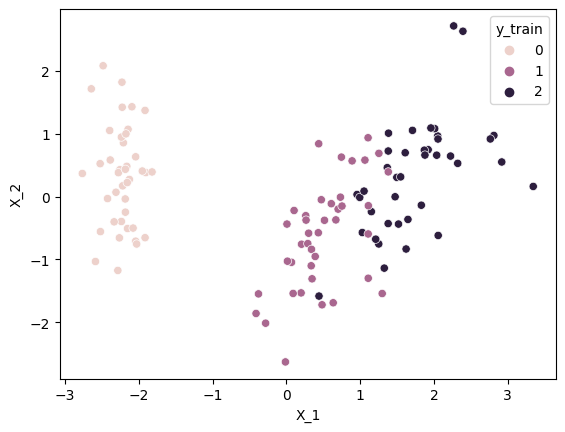

In [ ]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_train')
plt.show()

### 학습
- **다중 분류**(Multiclass Classification): **결정 트리**(Decision Tree)

In [ ]:
df_X = df[['X_1', 'X_2']].values
df_y = df['y_train'].values
print(type(df_X), type(df_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(df_X, df_y)

DecisionTreeClassifier(max_depth=3)

### 평가

In [ ]:
clf.score(df_X, df_y)

0.9416666666666667